# GEOG5990M Final Assignment

Student ID number:201778691

# Analysis of Fuel Poverty and Crime Rate in Leeds

## Introduction
Fuel poverty and crime rates are significant issues that impact the well-being of residents in urban areas. This project aims to investigate the relationship between fuel poverty and crime rates in Leeds, UK. By analyzing open data from multiple sources, I hope to gain insights that can be used for public good, such as informing policymakers and community stakeholders about areas that may require additional resources or interventions.

## Data Sources
1. Fuel Poverty Data: Sourced from Data Mill North, the data link is as follows:
   [Fuel Poverty Data](https://datamillnorth.org/dataset/2j70l/fuel-poverty-by-lsoa-england)
2. Crime Data: Street crime data of West Yorkshire for the year 2022, including details such as crime type and occurrence time, the data link is as follows:
   [data.police.uk](https://data.police.uk/)

## Objectives
1. To analyze the distribution of fuel poverty in Leeds.
2. To examine the spatial distribution of various types of crime in Leeds.
3. To investigate the relationship between fuel poverty rates and crime rates.
4. To provide visualizations that effectively communicate the findings to different audiences.


## Data Description

### Fuel Poverty Data
The fuel poverty data contains information about the number of households in each LSOA (Lower Layer Super Output Area) that are in fuel poverty. Key columns include:
- `LSOA Code`: The unique identifier for each LSOA.
- `Number of households`: Total number of households in the LSOA.
- `Number of households in fuel poverty`: Number of households in fuel poverty.
- `Proportion of households fuel poor (%)`: Proportion of households in fuel poverty.

### Crime Data
The crime data contains information about various types of crime reported in West Yorkshire, including Leeds. Key columns include:
- `LSOA code`: The unique identifier for each LSOA.
- `Crime type`: The type of crime reported.
- `Longitude` and `Latitude`: Geographical coordinates of the crime location.

### Leeds GeoJSON Data
The Leeds GeoJSON data provides the geographical boundaries of each LSOA in Leeds.


In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
from io import StringIO
from scipy.stats import spearmanr
import glob

# Load fuel poverty data
fuel_poverty_url = "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/Fuel%20poverty%20by%20LSOA%20.csv"
fuel_poverty_data = pd.read_csv(fuel_poverty_url)
print(fuel_poverty_data.head())

# Load crime data for all months
crime_data_urls = [
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-01-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-02-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-03-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-04-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-05-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-06-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-07-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-08-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-09-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-10-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-11-west-yorkshire-street.csv",
    "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/2022-12-west-yorkshire-street.csv"
]
all_crime_data = pd.concat((pd.read_csv(url) for url in crime_data_urls), ignore_index=True)
print(all_crime_data.head())

# Load Leeds geojson data
geojson_url = "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/Leeds.geojson"
leeds_geo = gpd.read_file(geojson_url)
print(leeds_geo.head())


   LSOA Code           LSOA Name    LA Code        LA Name      Region  \
0  E01020634  County Durham 001A  E06000047  County Durham  North East   
1  E01020635  County Durham 001B  E06000047  County Durham  North East   
2  E01020636  County Durham 001C  E06000047  County Durham  North East   
3  E01020654  County Durham 001D  E06000047  County Durham  North East   
4  E01020676  County Durham 001E  E06000047  County Durham  North East   

  Number of households  Number of households in fuel poverty  \
0                 710                                     59   
1                 632                                     48   
2                 827                                     85   
3                 818                                     65   
4                 699                                     82   

   Proportion of households fuel poor (%)  
0                                     8.3  
1                                     7.6  
2                                    1

## Data Cleaning and Processing

### Filtering Leeds Crime Data
I filtered the crime data to only include records for Leeds by selecting rows where the `LSOA code` starts with 'E010'.

### Handling Missing Values
I removed rows with missing values in the `LSOA code` column to ensure data integrity.

### Aggregating Crime Data
I aggregated the crime data by creating a pivot table that counts the number of occurrences of each crime type for each LSOA.

### Merging with Fuel Poverty Data
I merged the aggregated crime data with the fuel poverty data using the `LSOA Code` as the key.

### Dropping Unnecessary Columns
I dropped columns that were not needed for the analysis to create a clean and concise dataset.


In [9]:
# Filter crime data for Leeds, removing rows with NaN in 'LSOA code' column
all_crime_data = all_crime_data.dropna(subset=['LSOA code'])
leeds_crime_data = all_crime_data[all_crime_data['LSOA code'].str.startswith('E010')]
print(leeds_crime_data.head())

# Pivot table to get the count of different crime types per LSOA
crime_counts = leeds_crime_data.pivot_table(index='LSOA code', columns='Crime type', aggfunc='size', fill_value=0)
print(crime_counts.head())

# Merge with fuel poverty data
merged_data = pd.merge(fuel_poverty_data, crime_counts, left_on='LSOA Code', right_on='LSOA code')
print(merged_data.head())

# Drop columns that are not needed
final_data = merged_data[['LSOA Code', 'Number of households', 'Number of households in fuel poverty', 'Proportion of households fuel poor (%)'] + list(crime_counts.columns)]
print(final_data.head())

# Ensure 'Number of households' is an integer
final_data['Number of households'] = final_data['Number of households'].replace(',', '', regex=True).astype(int)

# Calculate total crime rate per 1000 households
final_data['Total Crime Rate per 1000 Households'] = (final_data.iloc[:, 5:].sum(axis=1) / final_data['Number of households']) * 1000

# Save the final cleaned and merged data for reproducibility
final_data.to_csv("leeds_crime_and_fuel_poverty_cleaned.csv", index=False)


                                            Crime ID    Month  \
0  b51a8ffcf605789c6be9cd07c97311b8b1faaa0ce0d96c...  2022-01   
1  acb6f40266da318fd82bd4265396c6c2e5cd7e0cabf37b...  2022-01   
2  f78e6a11150e94af881cbdf31ba9533dae26cd8ca361c6...  2022-01   
3                                                NaN  2022-01   
4  c69a2ecce06027e30f547c841abc0ee0ce8beb603720eb...  2022-01   

             Reported by           Falls within  Longitude   Latitude  \
0  West Yorkshire Police  West Yorkshire Police  -1.570572  53.607792   
1  West Yorkshire Police  West Yorkshire Police  -1.879031  53.943807   
2  West Yorkshire Police  West Yorkshire Police  -1.879031  53.943807   
3  West Yorkshire Police  West Yorkshire Police  -1.881808  53.942344   
4  West Yorkshire Police  West Yorkshire Police  -1.884392  53.944378   

                     Location  LSOA code      LSOA name  \
0  On or near Park/Open Space  E01007418  Barnsley 016A   
1   On or near Cross End Fold  E01010646  Bradford 0

<ipython-input-9-ef3ff2fafd05>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Number of households'] = final_data['Number of households'].replace(',', '', regex=True).astype(int)
<ipython-input-9-ef3ff2fafd05>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Total Crime Rate per 1000 Households'] = (final_data.iloc[:, 5:].sum(axis=1) / final_data['Number of households']) * 1000


## Data Analysis and non-spatial visualisation

### Spearman's Rank Correlation
I calculate Spearman's rank correlation for the total crime rate and each type of crime with the fuel poverty rate. This helps identify which types of crime are most strongly correlated with fuel poverty.

###Selecting Top Correlated Crime Types
I then select the top 5 crime types with the highest positive correlation with fuel poverty for further analysis.

### Scatter Plots with Regression Lines
Finally, I visualize the relationship between fuel poverty rate and the rates of the top correlated crime types using scatter plots and regression lines.


Total Crime Rate: Spearman's Rank Correlation: 0.58, p-value: 6.21e-127
Crime Type: Bicycle theft, Spearman's Rank Correlation: 0.25, p-value: 2.77e-21
Crime Type: Burglary, Spearman's Rank Correlation: 0.19, p-value: 4.01e-13
Crime Type: Criminal damage and arson, Spearman's Rank Correlation: 0.46, p-value: 9.19e-77
Crime Type: Drugs, Spearman's Rank Correlation: 0.50, p-value: 1.78e-89
Crime Type: Other crime, Spearman's Rank Correlation: 0.40, p-value: 3.54e-55
Crime Type: Other theft, Spearman's Rank Correlation: 0.38, p-value: 6.91e-51
Crime Type: Possession of weapons, Spearman's Rank Correlation: 0.39, p-value: 1.84e-52
Crime Type: Public order, Spearman's Rank Correlation: 0.48, p-value: 5.78e-83
Crime Type: Robbery, Spearman's Rank Correlation: 0.34, p-value: 5.30e-41
Crime Type: Shoplifting, Spearman's Rank Correlation: 0.14, p-value: 5.92e-08
Crime Type: Theft from the person, Spearman's Rank Correlation: 0.32, p-value: 4.26e-36
Crime Type: Vehicle crime, Spearman's Rank Cor

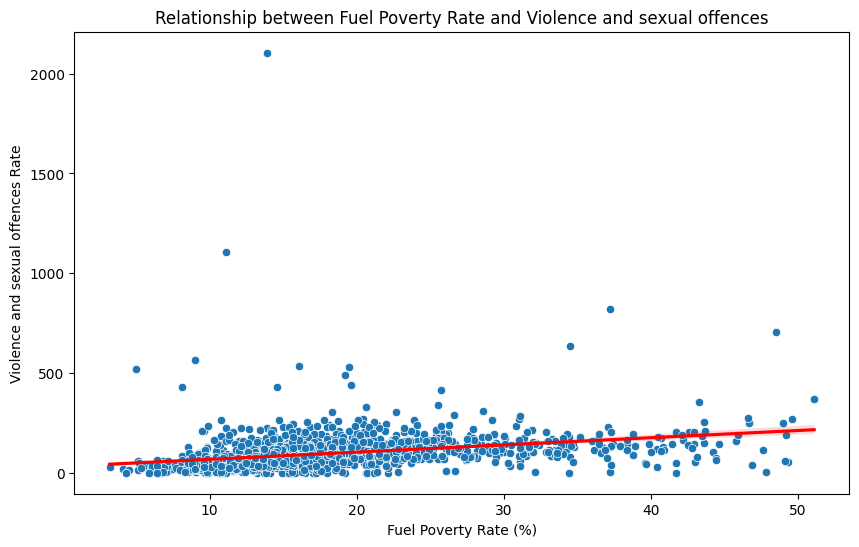

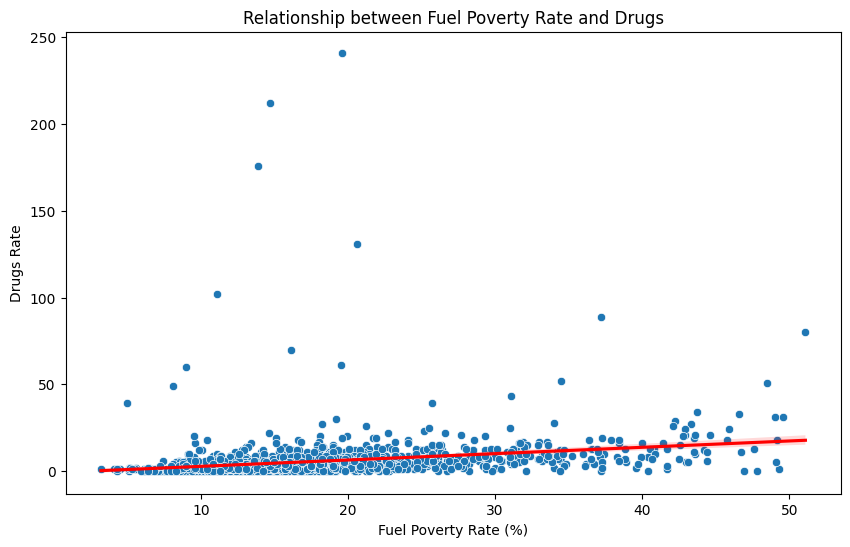

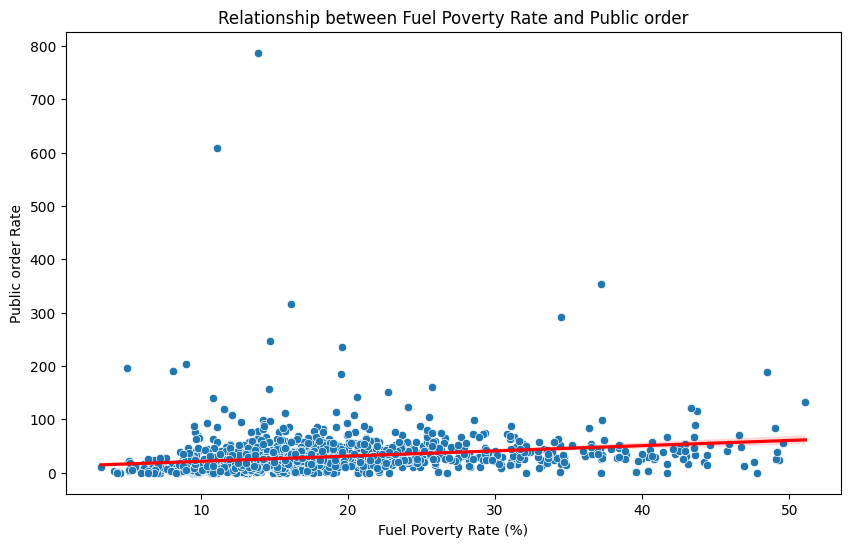

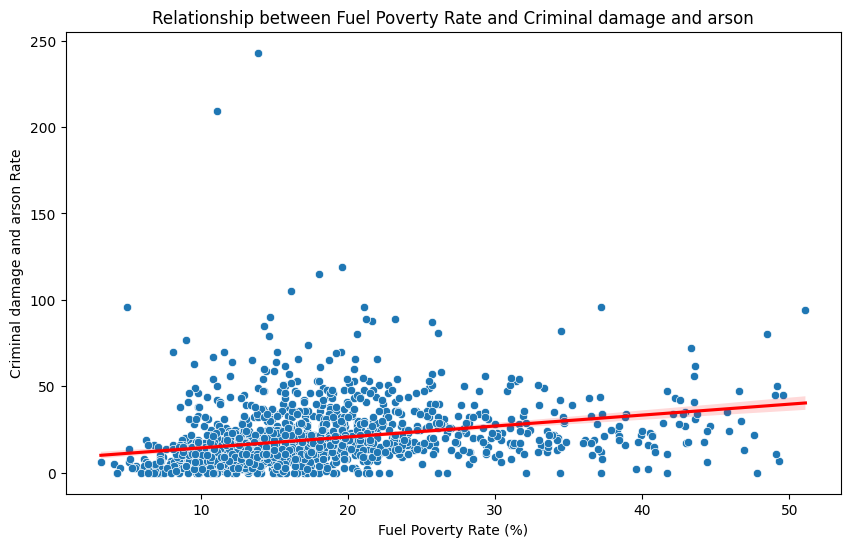

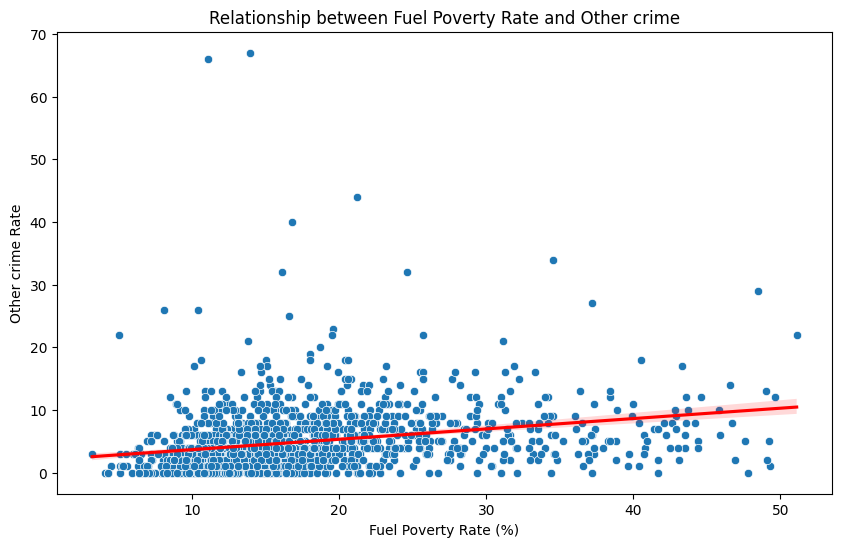

In [10]:
# Calculate Spearman's rank correlation for total crime rate
total_spearman_corr, total_p_value = spearmanr(final_data['Proportion of households fuel poor (%)'], final_data['Total Crime Rate per 1000 Households'])
print(f"Total Crime Rate: Spearman's Rank Correlation: {total_spearman_corr:.2f}, p-value: {total_p_value:.2e}")

# List of crime types to analyze
crime_types = final_data.columns[5:-1]

# Calculate Spearman's rank correlation for each crime type
spearman_results = {}
for crime_type in crime_types:
    spearman_corr, p_value = spearmanr(final_data['Proportion of households fuel poor (%)'], final_data[crime_type])
    spearman_results[crime_type] = (spearman_corr, p_value)

# Display Spearman's rank correlation results
for crime_type, (corr, p_value) in spearman_results.items():
    print(f"Crime Type: {crime_type}, Spearman's Rank Correlation: {corr:.2f}, p-value: {p_value:.2e}")

# Select top 5 crime types with highest positive correlation
top_crime_types = sorted(spearman_results.items(), key=lambda item: item[1][0], reverse=True)[:5]
top_crime_types = [crime_type for crime_type, _ in top_crime_types]

# Plot the relationship between fuel poverty rate and crime rates
for crime_type in top_crime_types:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=final_data, x='Proportion of households fuel poor (%)', y=crime_type)
    sns.regplot(data=final_data, x='Proportion of households fuel poor (%)', y=crime_type, scatter=False, color='red')
    plt.title(f'Relationship between Fuel Poverty Rate and {crime_type}')
    plt.xlabel('Fuel Poverty Rate (%)')
    plt.ylabel(f'{crime_type} Rate')
    plt.show()


## Spatial Visualization

I also create spatial visualizations of the crime rates in Leeds to understand the geographical distribution of crimes in relation to fuel poverty.


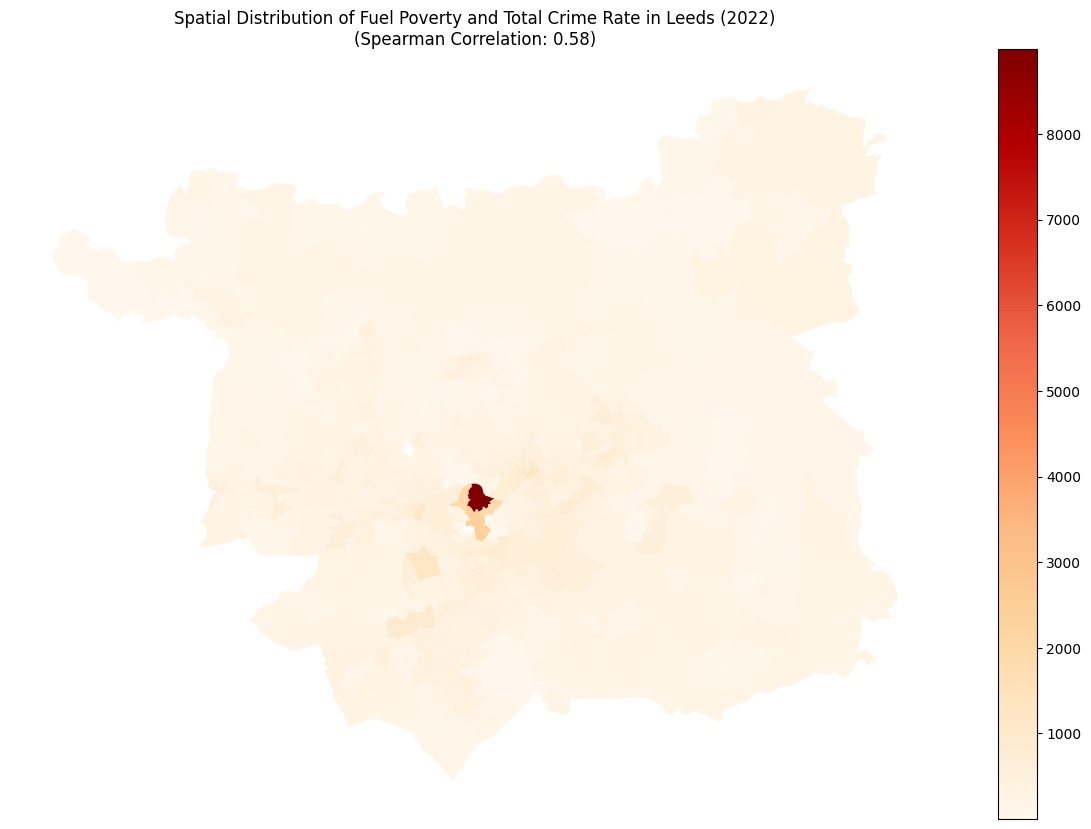

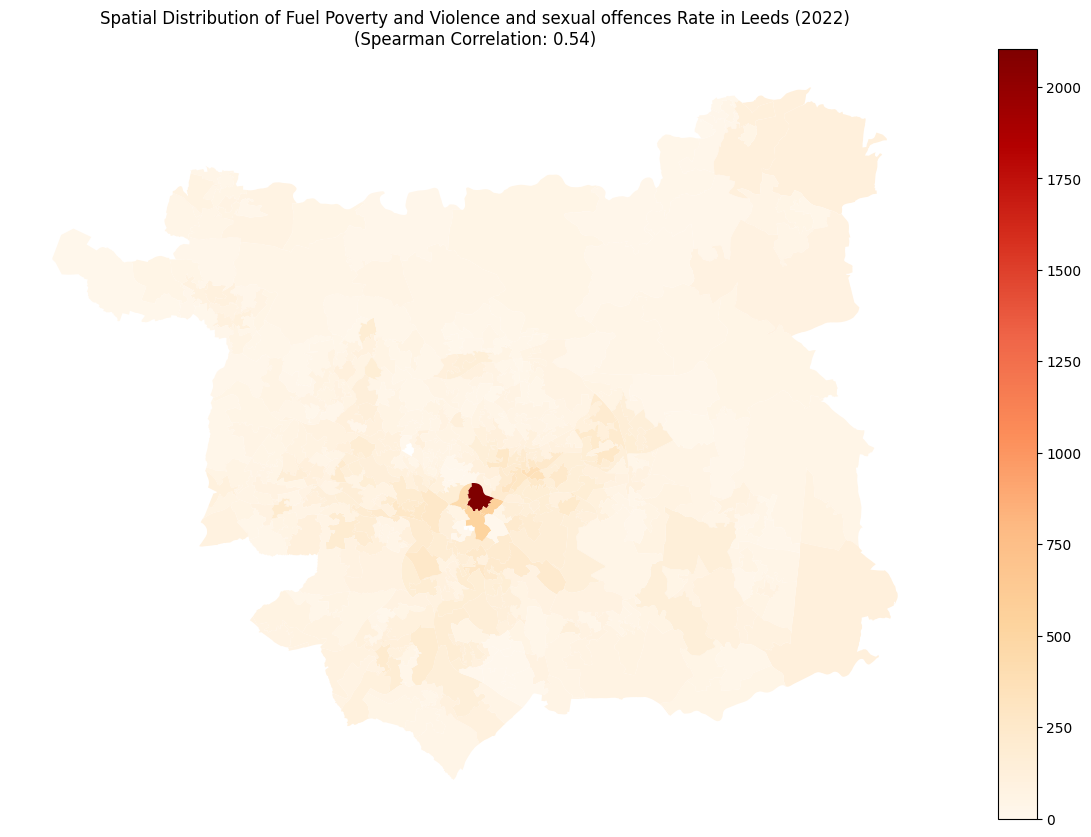

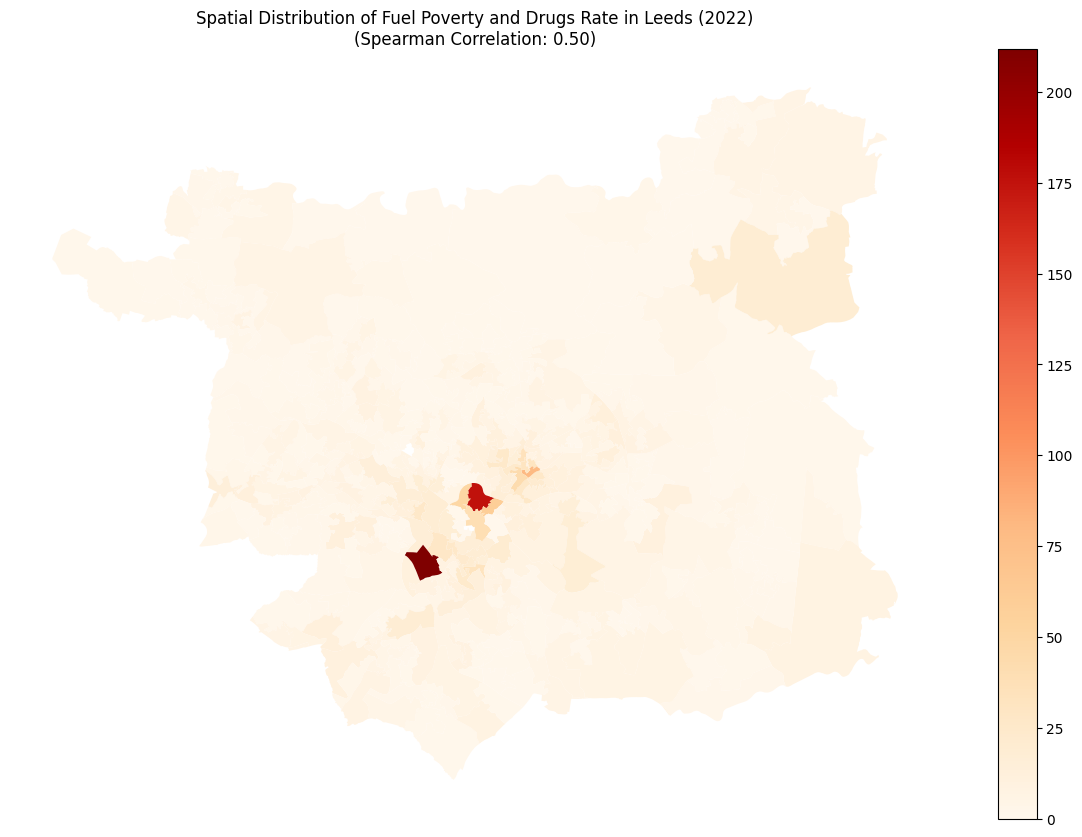

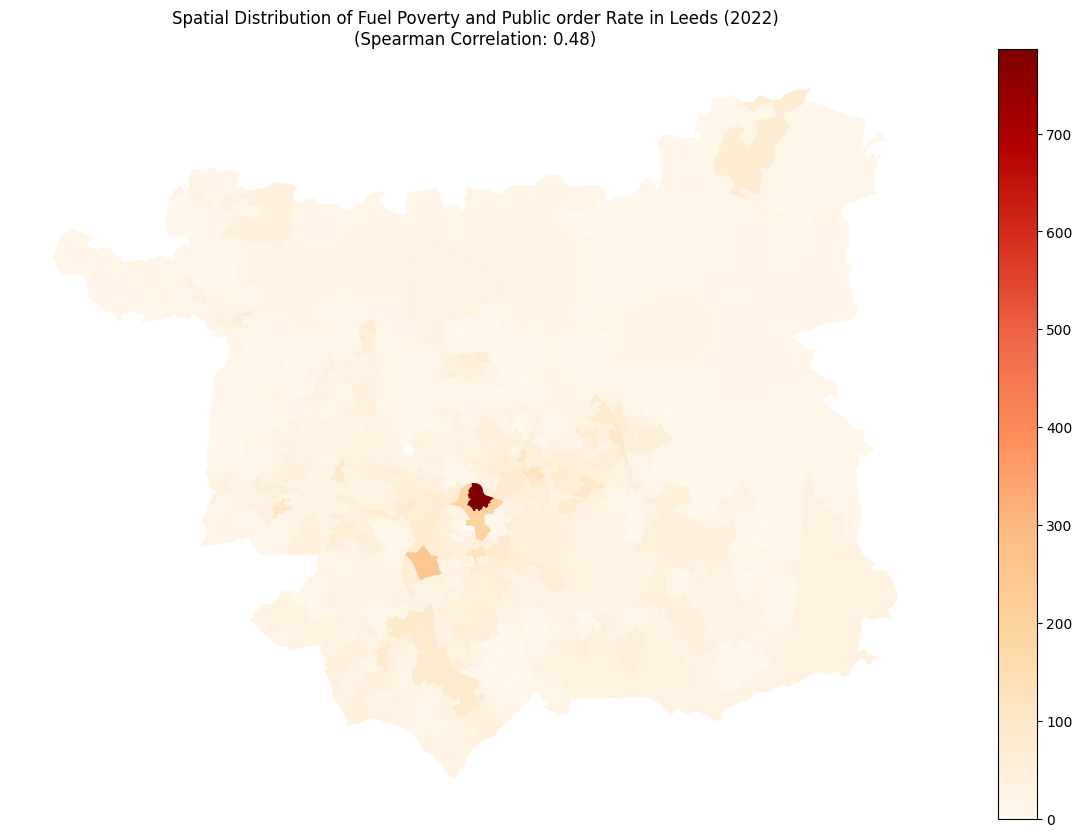

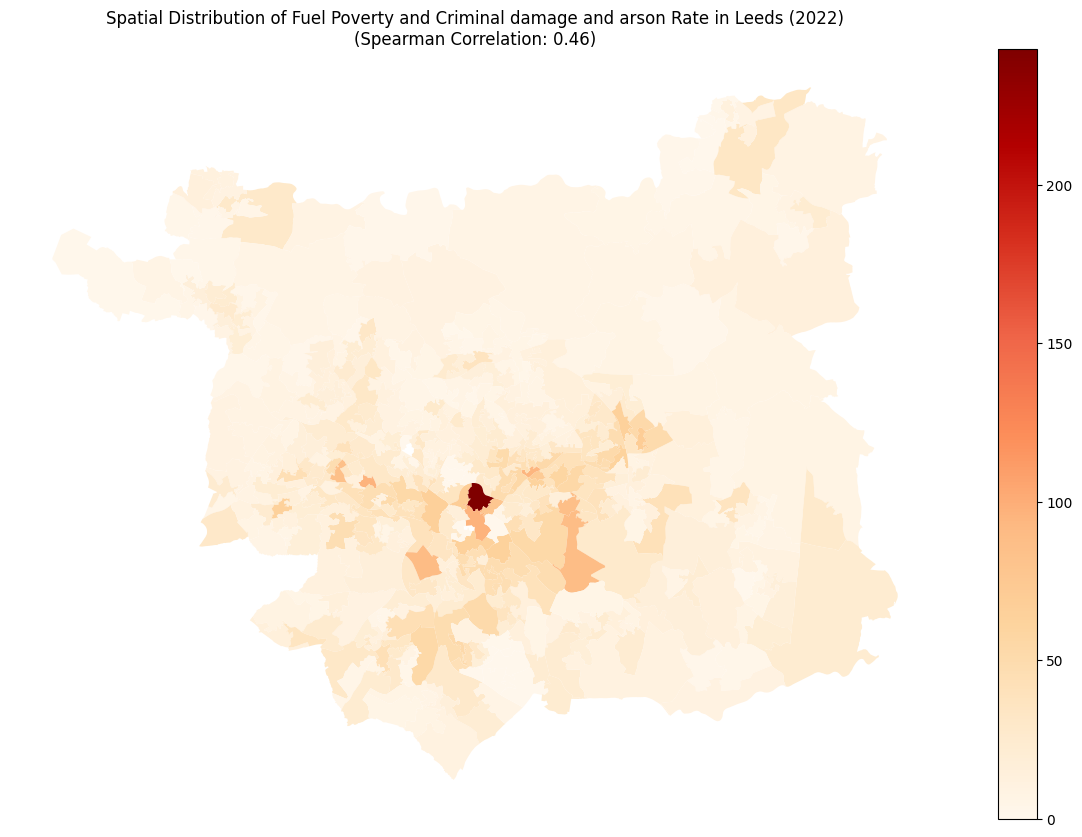

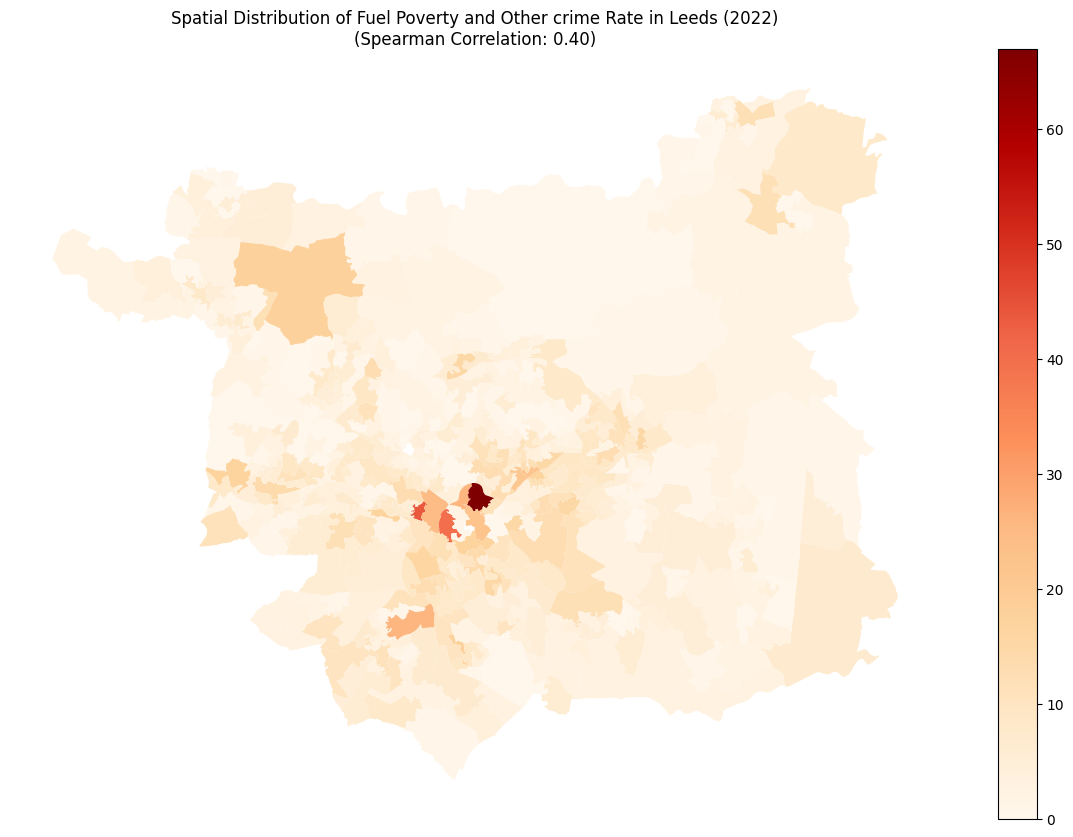

In [13]:
# Load the geographical data
geojson_url = "https://raw.githubusercontent.com/XinyuChen-0024/GEOG5990M-Final-Project-of-201778691/main/data/Leeds.geojson"
leeds_geo = gpd.read_file(geojson_url)

# Merge geographical data with the cleaned dataset
merged_geo = leeds_geo.merge(final_data, left_on='LSOA21CD', right_on='LSOA Code')

# Plot the spatial distribution of total crime rate in Leeds
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_geo.plot(column='Total Crime Rate per 1000 Households', ax=ax, legend=True, cmap='OrRd')
plt.title(f'Spatial Distribution of Fuel Poverty and Total Crime Rate in Leeds (2022)\n(Spearman Correlation: {total_spearman_corr:.2f})')
plt.axis('off')
plt.show()

# Plot the spatial distribution of top correlated crime types in Leeds
for crime_type in top_crime_types:
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_geo.plot(column=crime_type, ax=ax, legend=True, cmap='OrRd')
    plt.title(f'Spatial Distribution of Fuel Poverty and {crime_type} Rate in Leeds (2022)\n(Spearman Correlation: {spearman_results[crime_type][0]:.2f})')
    plt.axis('off')
    plt.show()


## Results and Conclusion

### Key Findings
- There is a positive correlation between fuel poverty rates and certain types of crime, such as violence and sexual offences, criminal damage and arson, and public order offences. This suggests that areas with higher fuel poverty rates tend to have higher rates of these crimes.
- The visualizations highlight the spatial distribution of fuel poverty and crime rates in Leeds, allowing us to identify specific areas that may require targeted interventions.

### Implications
These findings can inform policymakers and community stakeholders about the relationship between fuel poverty and crime. By addressing fuel poverty, it may be possible to reduce certain types of crime and improve the overall well-being of residents in Leeds.

### Future Work
Future research could explore additional factors that may influence the relationship between fuel poverty and crime, such as socioeconomic status, education levels, and employment rates. Additionally, implementing interventions to reduce fuel poverty and monitoring their impact on crime rates could provide valuable insights for policymakers.


## References
<p><a href="https://typeset.io/papers/crime-and-poverty-evidence-from-a-natural-experiment-12cwfakgrh?utm_source=chatgpt">[1]</a>Marcel, Fafchamps., Bart, Minten. (2002). Crime and Poverty: Evidence From a Natural Experiment. Research Papers in Economics,  </p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>